In [46]:
import numpy as np
import scipy as sp
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from tqdm.notebook import tqdm
from astropy.table import Table

plt.style.use('dark_background')

In [58]:
filepath = '/Users/gilliancartwright/Desktop/Deep Learning and Image Segmentation/'
filename = filepath + 'other.fits'

hdu_list = fits.open(filename)
images_sim = hdu_list[1].data
images_lens = hdu_list[2].data
data = pd.DataFrame(hdu_list[3].data)
hdu_list.close()

coadd_list = data["Y6_COADD_OBJECT_ID"].values.tolist()
NUM_PIX = 45  # pixels per axis

data.head(13)

,Y6_COADD_OBJECT_ID,TILENAME,HPIX_16384,HPIX_4096,DNF_ZMEAN_SOF,RA,DEC,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,...,SKYBRITE_WMEAN_G,SKYBRITE_WMEAN_R,SKYBRITE_WMEAN_I,SKYBRITE_WMEAN_Z,Z1,LENSED_MAG,mag_1,ISOLATION,EINSTEIN_RADIUS,MAGNIFICATION
0,1055868383,DES0017-0124,1183555245,73972202,0.622459,3.970410,-1.711331,5.851654,5.332797,5.040724,...,487.955994,1391.640015,3549.209961,7666.879883,1.745235,21.321891,22.772886,0.668650,3.677498,3.805379
1,1011852376,DES2331+0001,1231477876,76967367,0.101100,352.469894,0.343105,6.604491,6.131225,5.831058,...,471.927002,1380.619995,3485.129883,6751.240234,0.626176,20.131395,21.930271,0.676866,2.736300,5.242643
2,1321930648,DES0240+0209,1165362895,72835180,0.494753,40.121546,1.956542,4.005538,3.645439,3.561624,...,483.807007,1176.099976,3728.989990,9374.940430,1.485968,20.760362,23.052933,0.797777,4.495959,8.260917
3,1405107412,DES0339-2832,2365760919,147860057,0.502313,55.145973,-28.627959,4.442309,4.288599,3.936188,...,367.566986,982.726013,3114.419922,8148.229980,1.374741,20.710124,22.732843,0.683100,2.533013,6.442995
4,984393819,DES2256+0001,1234835829,77177239,0.532497,343.988537,-0.288405,4.721364,4.086586,3.837954,...,477.260010,1328.689941,3320.469971,7195.290039,1.362259,20.202368,22.691740,0.944474,5.094188,9.902594
5,1076618555,DES0031+0126,1184823459,74051466,0.391649,7.614233,1.600918,5.824796,5.219866,4.986630,...,440.924011,1207.709961,2765.560059,6454.129883,0.623133,21.471810,23.131670,0.498232,2.720892,4.612580
6,1323167288,DES0241-0416,1161844157,72615259,0.635092,40.015109,-4.166363,4.805872,4.426740,4.153852,...,442.083008,1152.250000,3563.340088,9549.929688,1.362603,20.514274,23.096598,0.739590,2.233504,10.787719
7,956139172,DES2220+0209,1258958191,78684886,0.149440,335.269314,2.170893,7.395364,6.708816,6.544659,...,475.692993,1227.930054,3085.300049,5723.029785,0.844381,20.528958,22.917967,0.783579,5.268263,9.028253
8,1237784601,DES0205+0043,1167877551,72992346,0.267713,31.213602,0.603276,7.133635,6.364225,6.167515,...,506.279999,1235.560059,3686.949951,7553.080078,0.800136,20.188706,21.883366,0.423436,1.773972,4.762815
9,1044503629,DES0009+0335,1276176818,79761051,0.480455,2.566620,3.288329,4.141036,3.679805,3.482992,...,454.752991,1315.469971,3576.219971,7410.729980,0.735697,20.899993,22.337269,0.868851,3.206537,3.757600


In [34]:
def plot_three(img_1, img_2, img_3, titles):
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))

    img1 = ax[0].imshow(img_1)
    plt.colorbar(img1, ax=ax[0])  
    ax[0].set_title(titles[0])
    ax[0].axis('off')

    img2 = ax[1].imshow(img_2)
    plt.colorbar(img2, ax=ax[1])
    ax[1].set_title(titles[1])
    ax[1].axis('off')

    img3 = ax[2].imshow(img_3)
    plt.colorbar(img3, ax=ax[2])
    ax[2].set_title(titles[2])
    ax[2].axis('off')

    plt.show()
    plt.close()

In [35]:
def rgb_graphs(name, sim_i, sim_r, sim_g, cutout_i, cutout_r, cutout_g):
    """
    Make three rgb plots per image: source simulation, lens cutout, and combined
    """
    loc = plticker.MultipleLocator(base=3.75)
    fig, ax = plt.subplots(figsize=(15, 4), ncols=3)

    sim_rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)
    
    ax[0].set_title('Source(s)')
    ax[0].axis('off')
    original = ax[0].imshow(sim_rgb, aspect='equal')

    cutout_rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
    ax[1].set_title('Lens')
    ax[1].axis('off')
    cutout = ax[1].imshow(cutout_rgb, aspect='equal')
            
    rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
    ax[2].set_title('Complete Simulation')
    ax[2].axis('off')
    projection = ax[2].imshow(rgb, aspect='equal')
   
    plt.show()
    plt.close()

    return rgb


In [36]:
def source_mask(single_band_img, stdev_threshold):
    """
    Input:
    single_band_img: 2d numpy array single band of the simulation
    stdev_threshold: number of standard deviations above mean to set threshold at

    Output: 2d numpy array of source mask

    """
    # turn 2d image into list
    pix_list = single_band_img.flatten(order='C')
    threshold = np.mean(pix_list) + stdev_threshold * np.std(pix_list)

    # iterate through pixels and change values to 0 or mask number
    for i, pix in enumerate(pix_list):
        if pix >= threshold:  # threshold value
            pix_list[i] = 1  # number pixels will be masked to
        else:
            pix_list[i] = 0

    # turn masked list back into 2d image
    masked = np.reshape(pix_list, (NUM_PIX, NUM_PIX), order='C')
    return masked



In [38]:
def lens_and_background_mask(single_band_img, row, stdev_threshold):    
    """
    Input: 
    single_band_img: single band of the lens cutout
    row: row of data table
    stdev_threshold: number of standard deviations above mean pixel value
                     to set threshold at

    Output: 2d numpy array of mask for lens and background objects

    """
    # the radius for the lens is the object's flux radius:
    flux_radius = data.iloc[0, 9]  # i band flux radius
    radius = 2 * flux_radius  # a few extra pixels as a buffer

    # make a list of coordinates (not arcsec)
    X2d, Y2d = np.meshgrid(np.arange(-22, 23), np.arange(-22, 23))
    coords = np.column_stack((Y2d.ravel(),X2d.ravel())).tolist()

    # make list of distances to center from coordinate list
    dist_from_center = []
    for i in range(len(coords)):
        distance = np.sqrt(coords[i][0] ** 2 + coords[i][1] ** 2)
        dist_from_center.append(distance)

    # turn 2d image into list
    pix_list = single_band_img.flatten(order='C')
    threshold = np.mean(pix_list) + stdev_threshold * np.std(pix_list)
    
    # iterate through pixels and set corresponding values
    for i, pix in enumerate(pix_list):
        if pix > threshold and dist_from_center[i] < radius:  # lens = 2
            pix_list[i] = 2  # number pixels will be masked to

        elif pix > threshold and dist_from_center[i] >= radius:  # noise = 4
            pix_list[i] = 4  # number for bright background noise

        else:  # background = 0
            pix_list[i] = 0

    # return to 2d form
    masked = np.reshape(pix_list, (NUM_PIX, NUM_PIX), order='C')

    return masked

In [39]:
def mask_image(coadd_id, source_threshold, lens_threshold):
    """
    Input: 
    coadd_id: Y6_COADD_OBJECT_ID of candidate
    source_threshold: num of stdevs above mean to set mag threshold to for masking
    lens_threshold: num of stdevs above mean to set mag threshold to for masking
    
    """
    # index dataframe by coadd_id
    row = data[data['Y6_COADD_OBJECT_ID'] == coadd_id].index[0]

    # images_sim
    source_g, source_r, source_i = images_sim[row][0], images_sim[row][1], images_sim[row][2]
    lens_g, lens_r, lens_i = images_lens[row][0], images_lens[row][1], images_lens[row][2]
    rgb = rgb_graphs('name', source_i, source_r, source_g, lens_i, lens_r, lens_g)

    # apply masks to source and lens
    masked_source = source_mask(source_i, source_threshold)
    masked_lens = lens_and_background_mask(lens_i, row, lens_threshold)
    
    # combine masks into one image
    all_masked = np.add(masked_source, masked_lens)
    
    # turn 2d image into list
    pix_list = all_masked.flatten(order='C')
    
    # iterate through pixels and change values to 0 or mask number
    for i, pix in enumerate(pix_list):
        if pix == 3:  # if lens and source overlap
            pix_list[i] = 2  # mask as lens
        elif pix == 5:  # if background noise and source overlap
            pix_list[i] = 4
            
        else:
            pix_list[i] = pix_list[i]

    # turn back into 2d image
    masked = np.reshape(pix_list, (NUM_PIX, NUM_PIX), order='C')
    
#     # (optional) plot everything
#     plot_three(masked_source, masked_lens, masked, ['Source Mask',
#                                                     'Lens and Noise Masks',
#                                                     'All Masks'])
    
    return (rgb, masked_source, masked_lens, masked)

### From Jimena Gonzalez for saving masks into FITS

  0%|          | 0/30 [00:00<?, ?it/s]

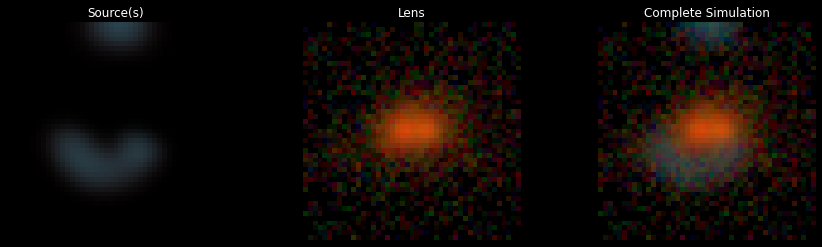

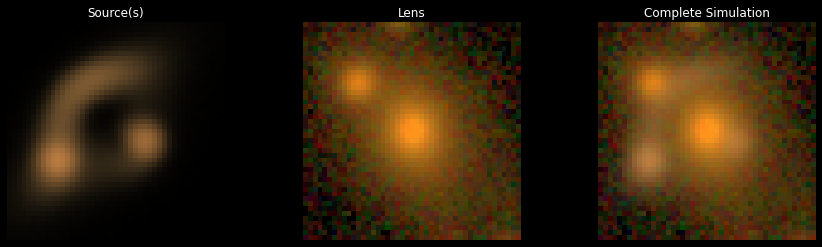

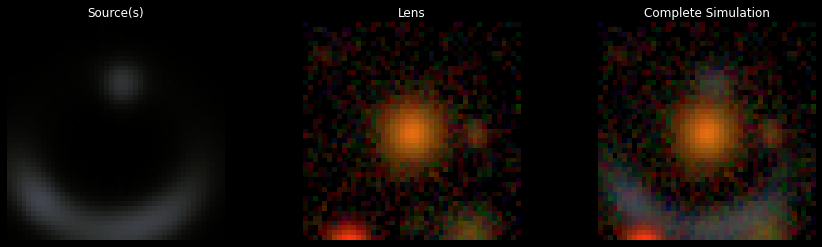

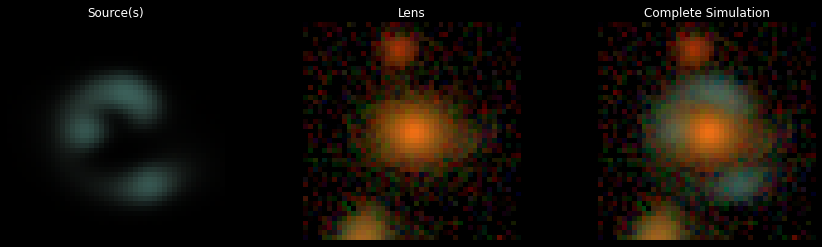

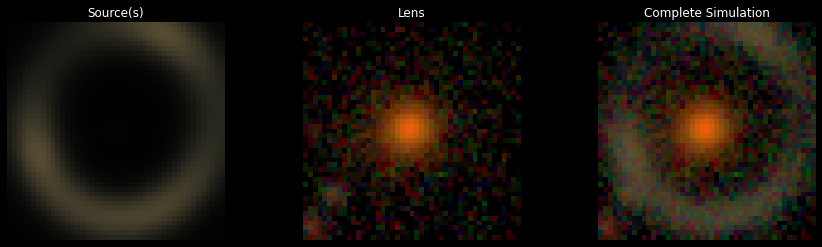

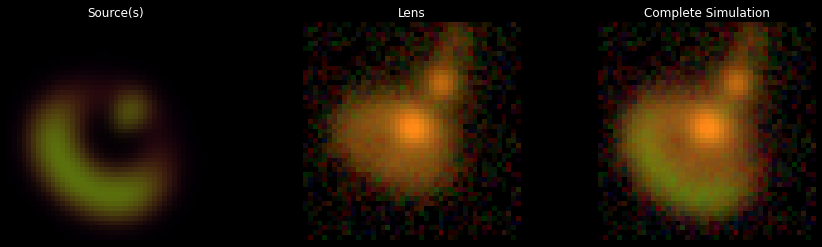

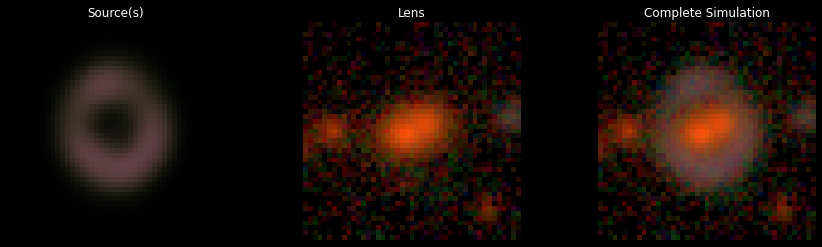

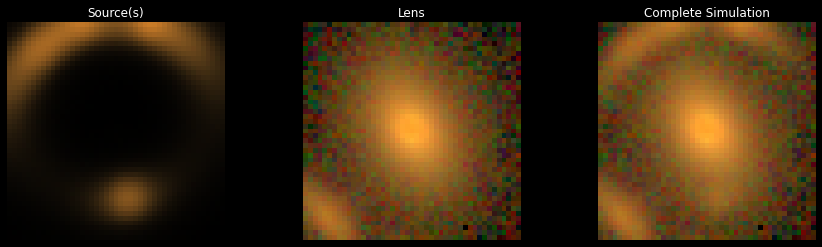

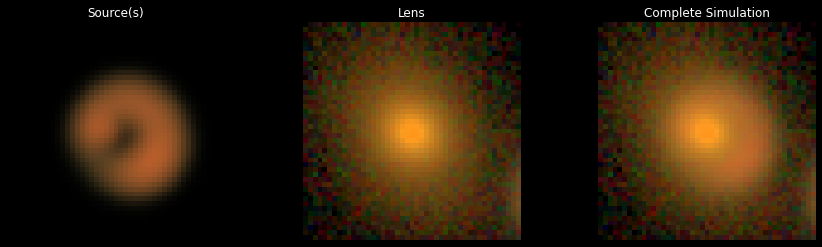

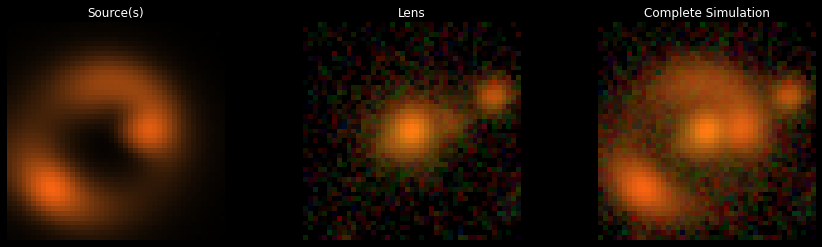

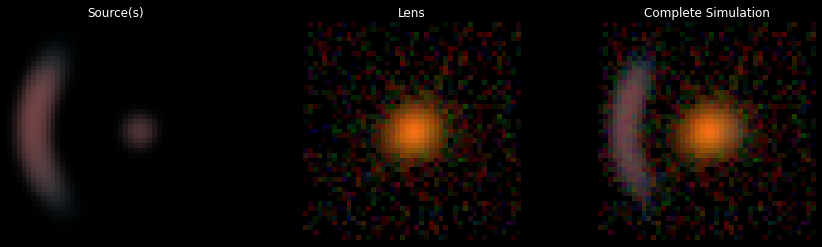

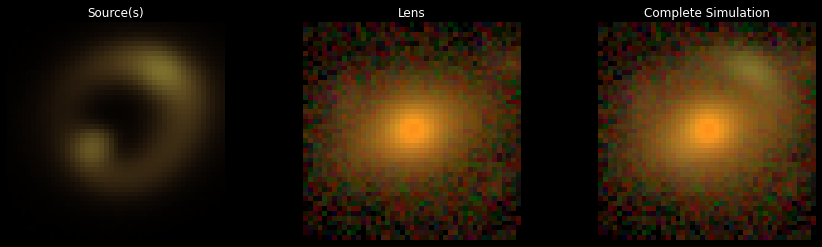

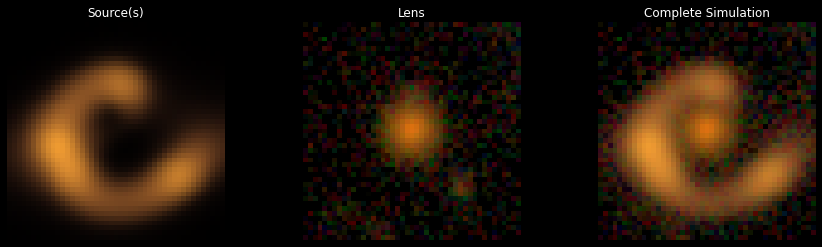

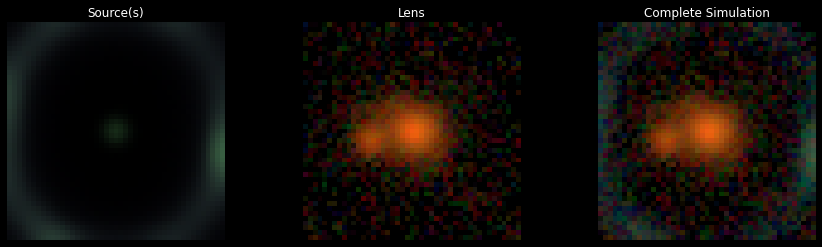

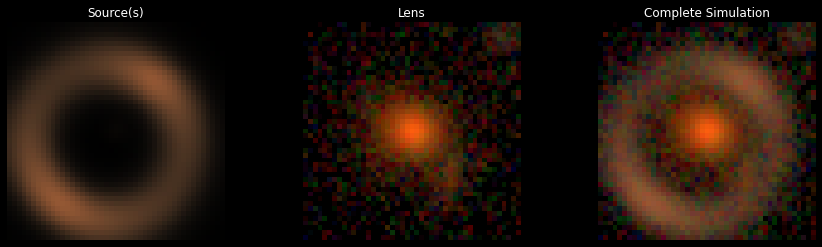

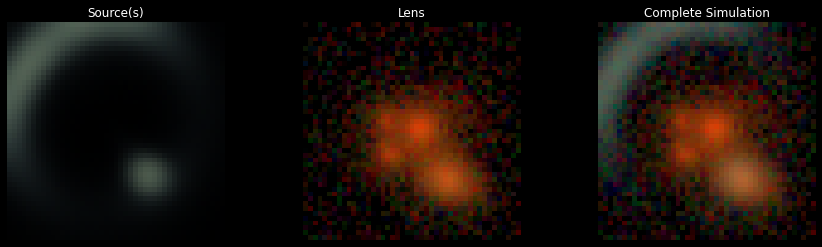

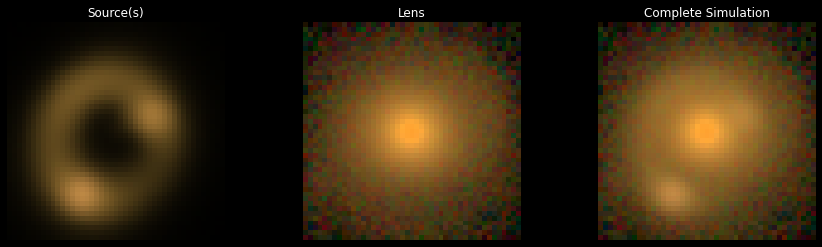

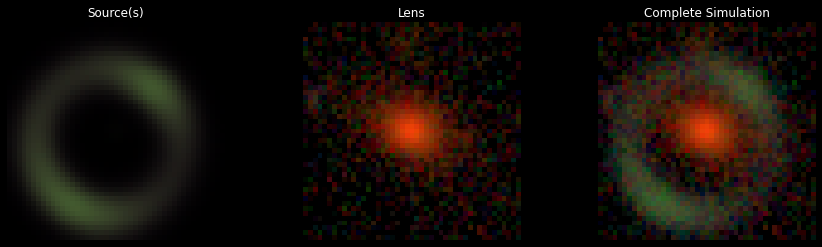

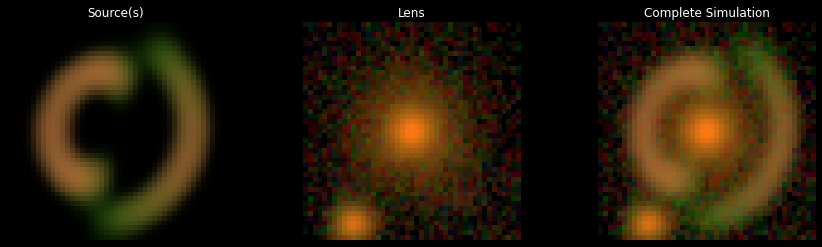

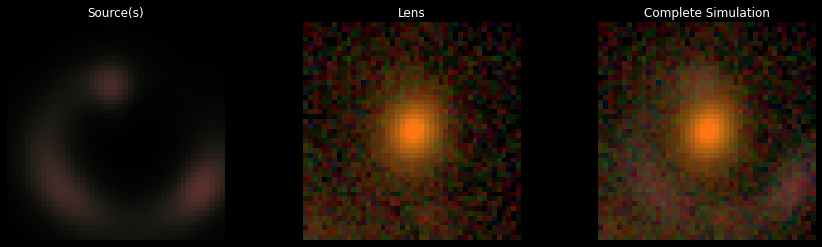

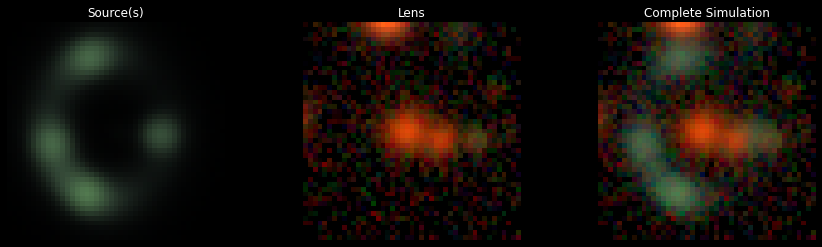

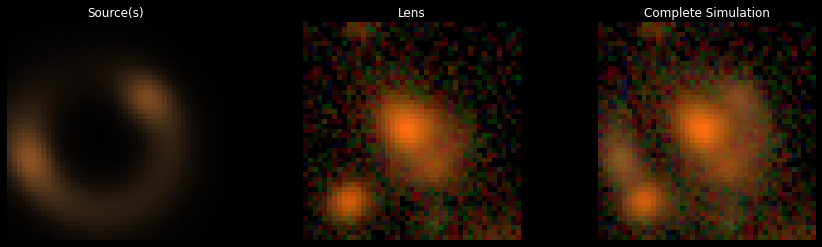

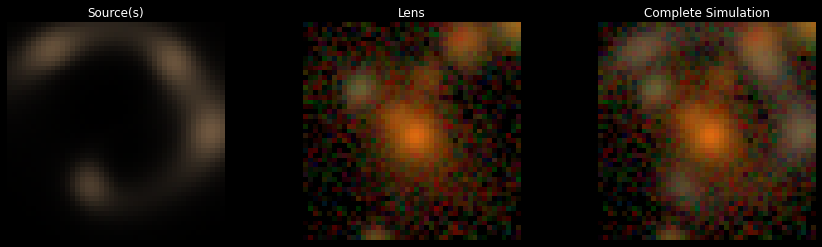

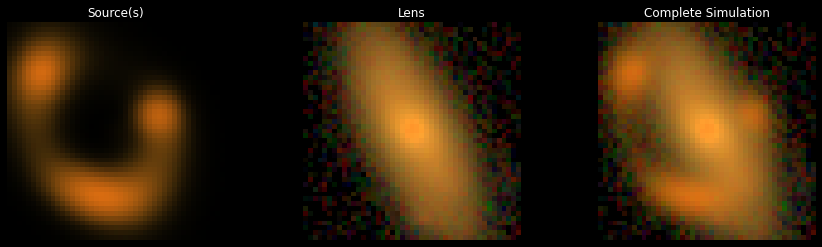

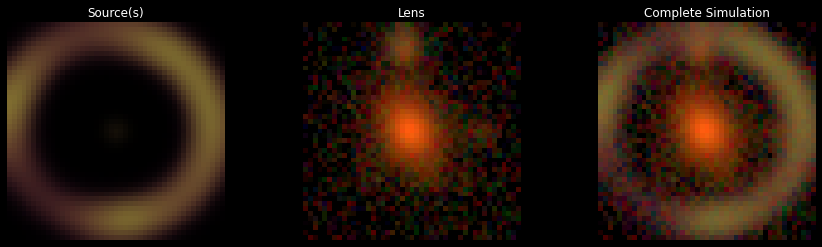

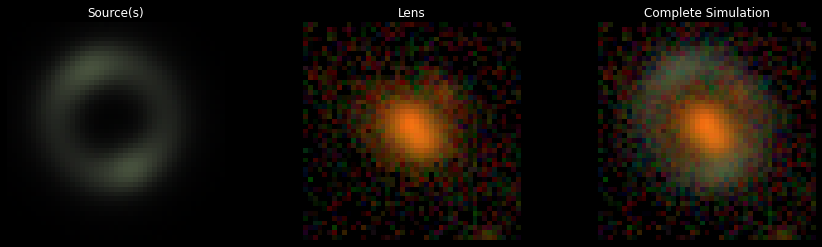

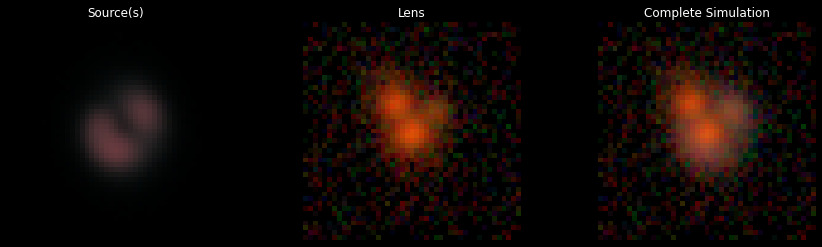

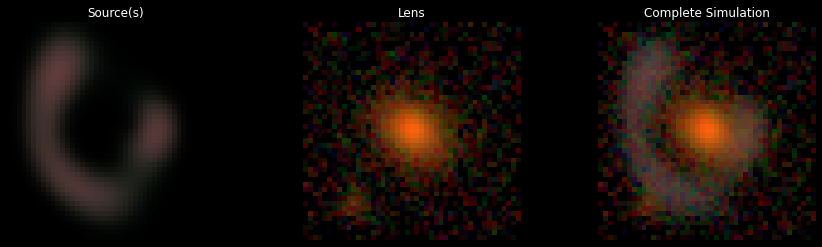

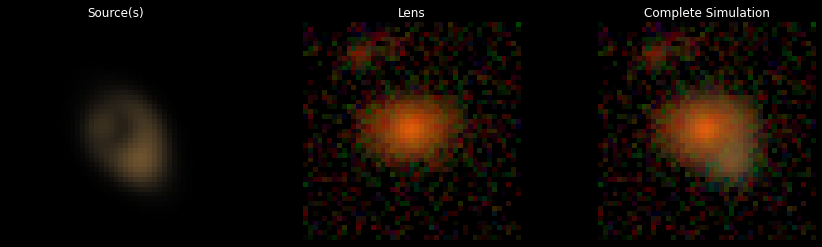

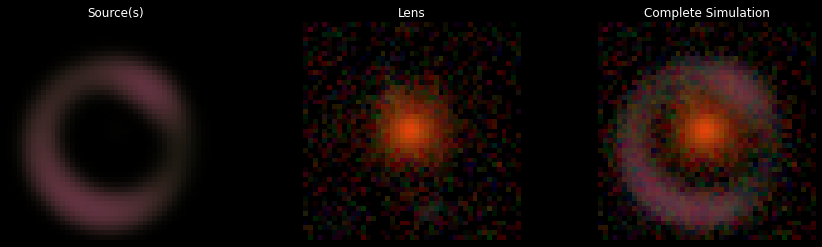

In [54]:
## TODO: images_complete is not working because it is a different shape
# images_complete = np.zeros((3, NUM_PIX, NUM_PIX))
images_complete = []  # FIX
masks_source = np.zeros((1, NUM_PIX, NUM_PIX))
masks_lens = np.zeros((1, NUM_PIX, NUM_PIX))
masks_complete = np.zeros((1, NUM_PIX, NUM_PIX))

with tqdm(total=len(data)) as pbar:
    for (index, row) in data.iterrows():
        rgb, masked_s, masked_l, masked_c = mask_image(row['Y6_COADD_OBJECT_ID'], 0.1, 1.75)

        images_complete.append(rgb)  # FIX

        masks_source = np.append(masks_source, [masked_s], axis=0)
        masks_lens = np.append(masks_lens, [masked_l], axis=0)
        masks_complete = np.append(masks_complete, [masked_c], axis=0)

        pbar.update(1)

masks_source = np.delete(masks_source, 0, axis=0)
masks_lens = np.delete(masks_lens, 0, axis=0)
masks_complete = np.delete(masks_complete, 0, axis=0)


In [55]:
# Writes fit file
def write_fit_file(name, images, data):
    my_types = {'Y6_COADD_OBJECT_ID': int, 'TILENAME': str, 'HPIX_16384': int, 'HPIX_4096': int,
       'DNF_ZMEAN_SOF': float, 'RA': float, 'DEC': float, 'FLUX_RADIUS_G': float, 'FLUX_RADIUS_R': float,
       'FLUX_RADIUS_I': float, 'FLUX_RADIUS_Z': float, 'KRON_RADIUS': float, 'GAP_FLUX_G': float,
       'MOF_BDF_FLUX_G': float, 'MOF_PSF_FLUX_G': float, 'SOF_BDF_FLUX_G': float, 'SOF_PSF_FLUX_G': float,
       'MAG_AUTO_G': float, 'MAG_APER_4_G': float, 'MAG_APER_8_G': float, 'SOF_BDF_G_1': float,
       'Y3_COADD_OBJECT_ID': int, 'REFMAG': float, 'REFMAG_ERR': float, 'LUM': float, 'ZREDMAGIC': float,
       'ZREDMAGIC_E': float, 'CHISQ': float, 'Z_LENS': float, 'MAG_G': float, 'MAG_R': float, 'MAG_I': float,
       'MAG_Z': float, 'MAG_ERR_G': float, 'MAG_ERR_R': float, 'MAG_ERR_I': float, 'MAG_ERR_Z': float,
       'ZG': float, 'ZR': float, 'ZI': float, 'ZZ': float, 'SOF_BDF_G_2': float, 'IMAFLAGS_ISO_G': int,
       'IMAFLAGS_ISO_R': int, 'IMAFLAGS_ISO_I': int, 'IMAFLAGS_ISO_Z': int, 'EXT_COADD': int,
       'FWHM_WMEAN_G': float, 'FWHM_WMEAN_R': float, 'FWHM_WMEAN_I': float, 'FWHM_WMEAN_Z': float,
       'SKYBRITE_WMEAN_G': float, 'SKYBRITE_WMEAN_R': float, 'SKYBRITE_WMEAN_I': float,
       'SKYBRITE_WMEAN_Z': float, 'Z1': float, 'LENSED_MAG': float, 'mag_1': float, 'ISOLATION': float,
       'EINSTEIN_RADIUS': float, 'MAGNIFICATION': float}

    data = data.astype(my_types)

    images_source, images_lens, images_complete = images[0], images[1], images[2]
    masks_source, masks_lens, masks_complete = images[3], images[4], images[5]
    
    primary = fits.PrimaryHDU()

    image1 = fits.ImageHDU(images_sim, name="IMAGE")
    image2 = fits.ImageHDU(images_lens, name="IMAGE")
    image3 = fits.ImageHDU(images_complete, name="IMAGE")
    image4 = fits.ImageHDU(masks_source, name="IMAGE")
    image5 = fits.ImageHDU(masks_lens, name="IMAGE")
    image6 = fits.ImageHDU(masks_complete, name="IMAGE")

    table_data = Table.from_pandas(data)
    table = fits.BinTableHDU(data = table_data)

    hdu_list = fits.HDUList([primary, image1, image2, image3, image4, image5, image6, table])
    hdu_list.writeto(name + '.fits', overwrite=True)
    hdu_list.close()

In [56]:
images = [images_sim, images_lens, images_complete, masks_source, masks_lens, masks_complete]
name = 'others_labeled_file'
write_fit_file(name, images, data)

In [59]:
# images_complete wrong, should have dimensions (45, 45, 3, 30) and format float64
new_filename = filepath + 'Image-Segmentation/others_labeled_file.fits'

hdu_list = fits.open(new_filename)
hdu_list.info()
hdu_list.close()

Filename: /Users/gilliancartwright/Desktop/Deep Learning and Image Segmentation/Image-Segmentation/others_labeled_file.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  IMAGE         1 ImageHDU        10   (45, 45, 3, 30)   float64   
  2  IMAGE         1 ImageHDU        10   (45, 45, 3, 30)   float64   
  3  IMAGE         1 ImageHDU        10   (3, 45, 45, 30)   uint8   
  4  IMAGE         1 ImageHDU         9   (45, 45, 30)   float64   
  5  IMAGE         1 ImageHDU         9   (45, 45, 30)   float64   
  6  IMAGE         1 ImageHDU         9   (45, 45, 30)   float64   
  7                1 BinTableHDU    130   30R x 61C   [K, 12A, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
